## Evolution of Lamb dipole interacting with initially uniform NIW field
Initially laterally coherent near-inertial oscillation of amplitude $u_0$ coupled with Lamb dipole of radius $R=2\pi/k_0$ and strength $U_0$.
This example runs in about 20 seconds on a MacPro 2.2 GHz Intel Core i7, 16 GB 1600 MHz DDR3.

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['contour.negative_linestyle'] = 'dashed'
%matplotlib inline
import numpy as np

from niwqg import CoupledModel as Model
from niwqg import InitialConditions as ic

## Simulations parameters

In [2]:
nx = 128
f0 = 1.e-4
N = 0.01
L = 2*np.pi*200e3
λz = 280
m = 2*np.pi/λz

# eddy parameters
k0 = 10*(2*np.pi/L)
L0 = 2*np.pi/k0

# initial conditions
U0 = 1.e-1
phi0 = 2*U0
u0 = phi0

# simulation parameters
Te = (U0*k0)**-1 # eddy turn-over time scale
Tf = 2*np.pi/f0

dt = .025*Te
tmax = 10*Te

## Setup model class

In [3]:
m = Model.Model(L=L,nx=nx, tmax = tmax,dt = dt,
                m=m,N=N,f=f0, twrite=int(0.5*Te/dt),
                nu4=10.e8,nu4w=10.e8,use_filter=False,
                U =-U0, tdiags=2,)

INFO:  Logger initialized
INFO:  No dealiasing; no filter


##  Setup initial conditions

In [4]:
q = ic.LambDipole(m, U=U0,R = 2*np.pi/k0)    # Lamb dipole for quasigeostrophic q-psi
phi = (np.ones_like(q) + 1j)*u0/np.sqrt(2)  # Uniform near-inertial velocity field

m.set_q(q)
m.set_phi(phi)

# Run the model

In [5]:
m.run()

INFO: Step: 19, Time: 9.500e+04, P: 4.750e-02 , KE QG: 6.183e-04, KE NIW: 2.000e-02, PE NIW: 2.335e-07,CFL: 0.176
INFO: Step: 38, Time: 1.900e+05, P: 9.500e-02 , KE QG: 6.176e-04, KE NIW: 2.000e-02, PE NIW: 9.133e-07,CFL: 0.176
INFO: Step: 57, Time: 2.850e+05, P: 1.425e-01 , KE QG: 6.164e-04, KE NIW: 2.000e-02, PE NIW: 2.003e-06,CFL: 0.175
INFO: Step: 76, Time: 3.800e+05, P: 1.900e-01 , KE QG: 6.150e-04, KE NIW: 2.000e-02, PE NIW: 3.448e-06,CFL: 0.175
INFO: Step: 95, Time: 4.750e+05, P: 2.375e-01 , KE QG: 6.132e-04, KE NIW: 2.000e-02, PE NIW: 5.160e-06,CFL: 0.175
INFO: Step: 114, Time: 5.700e+05, P: 2.850e-01 , KE QG: 6.113e-04, KE NIW: 2.000e-02, PE NIW: 7.018e-06,CFL: 0.209
INFO: Step: 133, Time: 6.650e+05, P: 3.325e-01 , KE QG: 6.094e-04, KE NIW: 2.000e-02, PE NIW: 8.878e-06,CFL: 0.245
INFO: Step: 152, Time: 7.600e+05, P: 3.800e-01 , KE QG: 6.076e-04, KE NIW: 2.000e-02, PE NIW: 1.062e-05,CFL: 0.278
INFO: Step: 171, Time: 8.550e+05, P: 4.275e-01 , KE QG: 6.060e-04, KE NIW: 2.000e-02,

## Snapshot

contours: potential vorticit; colors: NIW kinetic energy density

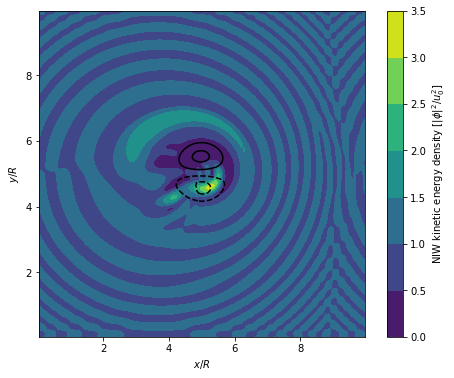

In [6]:
cq = [-2.5,-1.5,-.5,.5,1.5,2.5]

fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111,aspect=1)
plt.contourf(m.x/L0,m.y/L0,np.abs(m.phi)**2/u0**2)
plt.colorbar(label=r'NIW kinetic energy density $[|\phi|^2/u_0^2]$')
plt.contour(m.x/L0,m.y/L0,m.q/U0/k0,cq,colors='k')
plt.xlabel(r'$x/R$')
plt.ylabel(r'$y/R$')

## Get diagnostics

In [7]:
time = m.diagnostics['time']['value']
KE_qg = m.diagnostics['ke_qg']['value']
PE_niw = m.diagnostics['pe_niw']['value']
KE_niw = m.diagnostics['ke_niw']['value']
ENS_qg = m.diagnostics['ens']['value']

g1 = m.diagnostics['gamma_r']['value']
g2 = m.diagnostics['gamma_a']['value']
pi = m.diagnostics['pi']['value']
cKE_niw = m.diagnostics['cke_niw']['value']
iKE_niw = m.diagnostics['ike_niw']['value']

ep_phi = m.diagnostics['ep_phi']['value']
ep_psi = m.diagnostics['ep_psi']['value']
chi_q =  m.diagnostics['chi_q']['value']
chi_phi =  m.diagnostics['chi_phi']['value']

dt = time[1]-time[0]
dPE = np.gradient(PE_niw,dt)
dKE = np.gradient(KE_qg,dt)
diKE_niw = np.gradient(iKE_niw,dt)

res_ke = dKE-(-g1-g2+ep_psi)
res_pe = dPE-g1-g2-chi_phi

## Energy budget, etc.

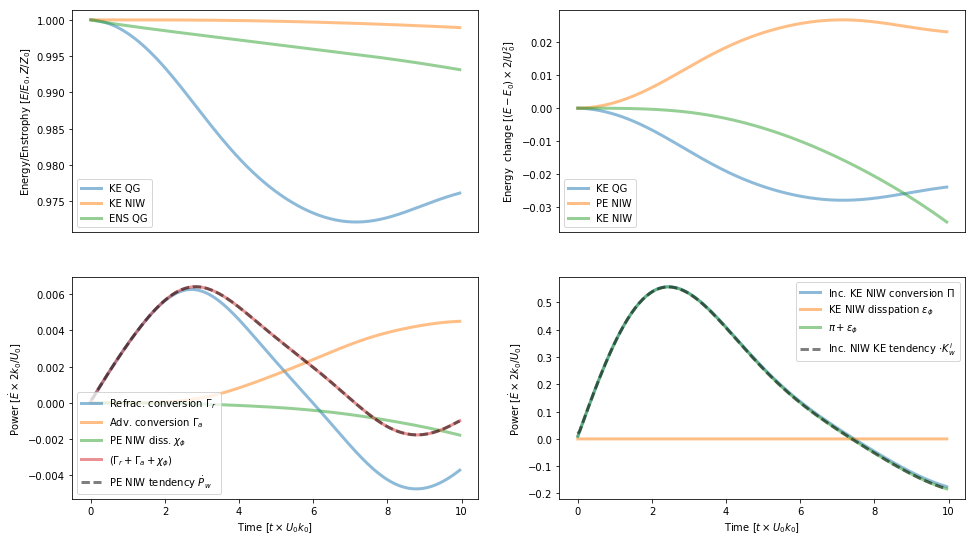

In [9]:
fig = plt.figure(figsize=(16,9))
lw, alp = 3.,.5
KE0 = KE_qg[0]

ax = fig.add_subplot(221)
plt.plot(time/Te,KE_qg/KE0,label='KE QG',linewidth=lw,alpha=alp)
plt.plot(time/Te,KE_niw/KE_niw[0],label='KE NIW',linewidth=lw,alpha=alp)
plt.plot(time/Te,ENS_qg/ENS_qg[0],label='ENS QG',linewidth=lw,alpha=alp)
plt.xticks([])
plt.ylabel(r'Energy/Enstrophy $[E/E_0, Z/Z_0]$')
plt.legend(loc=3)

ax = fig.add_subplot(222)
plt.plot(time/Te,(KE_qg-KE_qg[0])/KE0,label='KE QG',linewidth=lw,alpha=alp)
plt.plot(time/Te,(PE_niw-PE_niw[0])/KE0,label='PE NIW',linewidth=lw,alpha=alp)
plt.plot(time/Te,(KE_niw-KE_niw[0])/KE0,label='KE NIW',linewidth=lw,alpha=alp)
plt.xticks([])
plt.ylabel(r'Energy  change $[(E-E_0) \times {2}/{U_0^2} ]$')
plt.legend(loc=3)

ax = fig.add_subplot(223)
plt.plot(time/Te,Te*g1/KE0,label=r'Refrac. conversion $\Gamma_r$',linewidth=lw,alpha=alp)
plt.plot(time/Te,Te*g2/KE0,label=r'Adv. conversion $\Gamma_a$',linewidth=lw,alpha=alp)
plt.plot(time/Te,Te*chi_phi/KE0,label=r'PE NIW diss. $\chi_\phi$',linewidth=lw,alpha=alp)
plt.plot(time/Te,Te*(g1+g2+chi_phi)/KE0,label=r'$(\Gamma_r+\Gamma_a+\chi_\phi)$',linewidth=lw,alpha=alp)
plt.plot(time/Te,Te*dPE/KE0,'k--',label=r'PE NIW tendency $\dot P_w$',linewidth=lw,alpha=alp)
plt.legend(loc=3,ncol=1)
plt.xlabel(r"Time [$t \times U_0 k_0$]")
plt.ylabel(r'Power $[\dot E \times {2 k_0}/{U_0} ]$')

ax = fig.add_subplot(224)
plt.plot(time/Te,Te*pi/KE0,label=r'Inc. KE NIW conversion $\Pi$',linewidth=lw,alpha=alp)
plt.plot(time/Te,Te*ep_psi/KE0,label=r'KE NIW disspation $\epsilon_\phi$',linewidth=lw,alpha=alp)
plt.plot(time/Te,Te*(pi+ep_phi)/KE0,label=r'$\pi+\epsilon_\phi$',linewidth=lw,alpha=alp)
plt.plot(time/Te,Te*diKE_niw/KE0,'k--',label=r'Inc. NIW KE tendency $\cdot K_w^i$',linewidth=lw,alpha=alp)
plt.xlabel(r"Time [$t \times U_0 k_0$]")
plt.ylabel(r'Power $[\dot E \times {2 k_0}/{U_0} ]$')
plt.legend(loc=1)